In [165]:
import pandas as pd

data = "data.csv"
read = pd.read_csv(data)
print(read)

    age  experience   rank  nation   go
0    36           10      9     uk   no
1    42           12      4    usa   no
2    23            4      6      n   no
3    52            4      4    usa   no
4    43           21      8    usa  yes
5    44           14      5     uk   no
6    66            3      7      n  yes
7    35           14      9     uk  yes
8    52           13      7      n  yes
9    35            5      9      n  yes
10   24            3      5    usa   no
11   18            3      7     uk  yes
12   45            9      9     uk  yes


In [166]:
## in order to make a decision tree all data must be numerical
## we have to convert non-numerical to numerical using the map method
d = {"uk": 0, "usa": 1, "n": 2}

read["nation"] = read["nation"].map(d)

In [167]:
d = {"uk": 0, "usa": 1, "n": 2}

read["nation"] = read["nation"].map(d)

In [168]:
d = {"yes": 1, "no": 0}

read["go"] = read["go"].map(d)

In [169]:
print(read)

    age  experience   rank   nation  go
0    36           10      9     NaN   0
1    42           12      4     NaN   0
2    23            4      6     NaN   0
3    52            4      4     NaN   0
4    43           21      8     NaN   1
5    44           14      5     NaN   0
6    66            3      7     NaN   1
7    35           14      9     NaN   1
8    52           13      7     NaN   1
9    35            5      9     NaN   1
10   24            3      5     NaN   0
11   18            3      7     NaN   1
12   45            9      9     NaN   1


In [170]:
features = ['age', 'nation', 'go']
X = read[features]
y = read['go']

print("x:\n", X)
print("\ny:")
print(y)

x:
     age  nation  go
0    36     NaN   0
1    42     NaN   0
2    23     NaN   0
3    52     NaN   0
4    43     NaN   1
5    44     NaN   0
6    66     NaN   1
7    35     NaN   1
8    52     NaN   1
9    35     NaN   1
10   24     NaN   0
11   18     NaN   1
12   45     NaN   1

y:
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: go, dtype: int64


In [171]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [172]:
data = "play.csv"
file = pd.read_csv(data)
print(file)

   number play   outlook  humidity   wind  temp
0       1  yes       sun        50   True    20
1       2  yes      rain        60   True    12
2       3   no  overcast        70  False    12
3       4  yes     rain         89  False    15
4       5   no       sun        90   True     8
5       6   no  overcast        24   True     3
6       7  yes      rain        44   True    14
7       8  yes      rain        22  False    23


In [173]:
info = {'yes': 1, 'no': 0}

file['play'] = file['play'].map(info)

In [174]:
outlook = {'rain': 0, 'sun': 1, 'overcast': 2}

file['outlook'] = file['outlook'].map(outlook)

In [175]:
print(file)

   number  play  outlook  humidity   wind  temp
0       1     1      1.0        50   True    20
1       2     1      0.0        60   True    12
2       3     0      2.0        70  False    12
3       4     1      NaN        89  False    15
4       5     0      1.0        90   True     8
5       6     0      2.0        24   True     3
6       7     1      0.0        44   True    14
7       8     1      0.0        22  False    23


In [176]:
features = ['outlook', 'humidity', 'wind', 'temp']

X = file[features]
y = file['play']

print("X: \n", X, "\n")
print("y:\n", y)

X: 
    outlook  humidity   wind  temp
0      1.0        50   True    20
1      0.0        60   True    12
2      2.0        70  False    12
3      NaN        89  False    15
4      1.0        90   True     8
5      2.0        24   True     3
6      0.0        44   True    14
7      0.0        22  False    23 

y:
 0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    1
Name: play, dtype: int64


In [177]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

[Text(0.4, 0.8333333333333334, 'outlook <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'temp <= 16.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

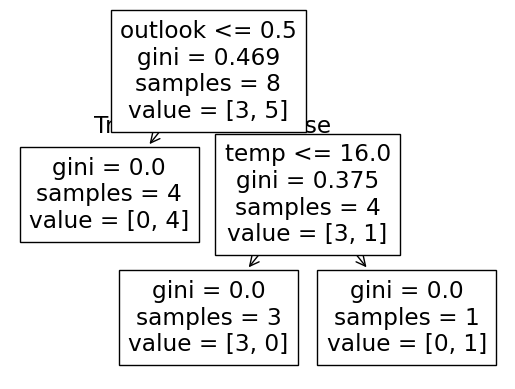

In [178]:
tree.plot_tree(dtree, feature_names=features)

In [179]:
pm = "PremierLeagueSeason2024.csv"
read = pd.read_csv(pm)
print(read)

                        team  goals_scored  goals_conceded  wins  draws  \
0            Manchester City           179              66    55     12   
1                  Liverpool           154              83    44     19   
2                    Arsenal           146              68    46     12   
3          Manchester United           130             102    39     17   
4                    Chelsea           135              99    37     19   
5          Tottenham Hotspur           142             106    38     14   
6                Aston Villa           131             107    36     15   
7            West Ham United           122             121    33     18   
8                    Everton            87              99    30     17   
9           Newcastle United           131             124    30     15   
10            Crystal Palace            98             124    25     18   
11   Wolverhampton Wanderers            86             117    25     16   
12  Brighton and Hove Alb

In [180]:
newData = ['wins', 'draws']
XVALUE = read[newData]
yvalue = read['wins']

print("X: \n",XVALUE)
print("yvalue: \n", yvalue)

X: 
     wins  draws
0     55     12
1     44     19
2     46     12
3     39     17
4     37     19
5     38     14
6     36     15
7     33     18
8     30     17
9     30     15
10    25     18
11    25     16
12    21     26
13    18     21
14    20      6
15    15     18
16    18      5
17    13      9
18    12      7
19    10      9
20    10      9
21     9      9
22     6      8
23     5     60
yvalue: 
 0     55
1     44
2     46
3     39
4     37
5     38
6     36
7     33
8     30
9     30
10    25
11    25
12    21
13    18
14    20
15    15
16    18
17    13
18    12
19    10
20    10
21     9
22     6
23     5
Name: wins, dtype: int64


In [181]:
from sklearn.datasets import load_iris

In [182]:
from sklearn import datasets

In [183]:
iris = datasets.load_iris()
XVALUE = iris.data
y = iris.target

In [184]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [185]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(XVALUE, y)
plt.show()

In [186]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [187]:
iris = datasets.load_iris() # this line of code loads popular datasets and artificial data generators
XVALUE = iris.data # here I make a dataframe(aka. rows, cols)
y = iris.target

In [188]:
clf = tree.DecisionTreeClassifier() # here I am calling the decision tree constructor
clf = clf.fit(XVALUE, y)# 

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

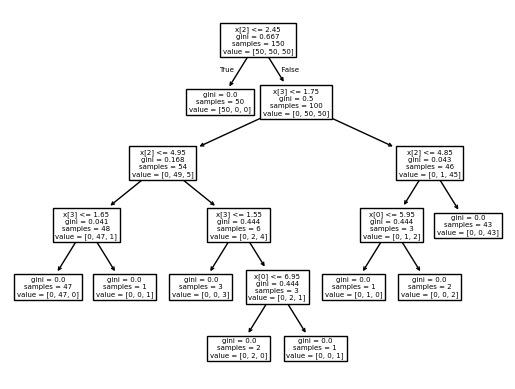

In [189]:
tree.plot_tree(clf)

In [190]:
plt.show()

                        team  goals_scored  goals_conceded  wins  draws  \
0            Manchester City           179              66    55     12   
1                  Liverpool           154              83    44     19   
2                    Arsenal           146              68    46     12   
3          Manchester United           130             102    39     17   
4                    Chelsea           135              99    37     19   
5          Tottenham Hotspur           142             106    38     14   
6                Aston Villa           131             107    36     15   
7            West Ham United           122             121    33     18   
8                    Everton            87              99    30     17   
9           Newcastle United           131             124    30     15   
10            Crystal Palace            98             124    25     18   
11   Wolverhampton Wanderers            86             117    25     16   
12  Brighton and Hove Alb

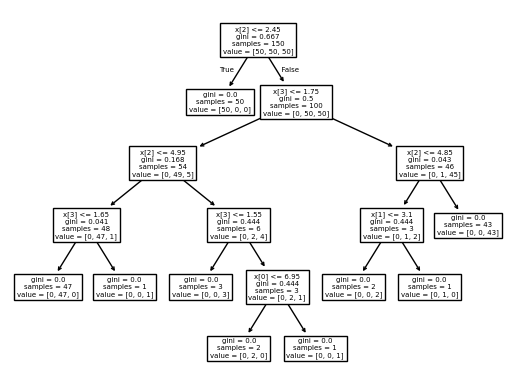

In [191]:
pm = "PremierLeagueSeason2024.csv"
read = pd.read_csv(pm)
print(read)

newData = ['wins', 'draws']
XVALUE = read[newData]
yvalue = read['wins']

print("X: \n",XVALUE)
print("yvalue: \n", yvalue)

iris = datasets.load_iris()
XVALUE = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf = clf.fit(XVALUE, y)

tree.plot_tree(clf)
plt.show()

In [192]:
# ---------------------------------------------------------------------------- #
# any of the above code is just used to get an understanding of decision trees
# the below code is my actual code to make one decision tree on my sports dataset
# ---------------------------------------------------------------------------- #

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [193]:
iris = datasets.load_iris() # this line of code loads popular datasets and artificial data generators
XVAL = iris.data # here I make a dataframe(aka. rows, cols)
y = iris.target # this is my target colunm I am trying to predict

In [194]:
clf = tree.DecisionTreeClassifier() # here I am calling the decision tree constructor to make a decision tree
clf = clf.fit(XVAL, y) # this line of code builds a decision tree from the training set (XVAL, y).

In [195]:
clf

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

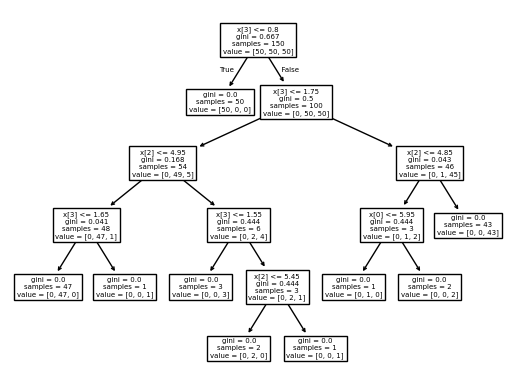

In [196]:
tree.plot_tree(clf) # this line of code plots the tree

## my code was showing the tree but it is not now....

In [197]:
# firstly I need to read in my dataset
import pandas as pd
dataset = "PremierLeagueSeason2024.csv"
read = pd.read_csv(dataset)

In [198]:
# now I need to find my target variable that I want predict
# XVAL is my dataframe(rows, cols), this is what I am using to try and predict from

data = ['goals_scored', 'goals_conceded', 'wins'] # this is what I am trying to predict from
XVAL = read[data] # this is my target colunm I am trying to predict

In [199]:
XVAL

,goals_scored,goals_conceded,wins
0,179,66,55
1,154,83,44
2,146,68,46
3,130,102,39
4,135,99,37
5,142,106,38
6,131,107,36
7,122,121,33
8,87,99,30
9,131,124,30


In [200]:
y = read['rank']

In [201]:
y

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
Name: rank, dtype: int64

In [202]:
# now I am going to display and show my decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(XVAL, y)

[Text(0.07692307692307693, 0.9772727272727273, 'wins <= 5.5\ngini = 0.958\nsamples = 24\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.038461538461538464, 0.9318181818181818, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.057692307692307696, 0.9545454545454546, 'True  '),
 Text(0.11538461538461539, 0.9318181818181818, 'goals_scored <= 48.0\ngini = 0.957\nsamples = 23\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 0]'),
 Text(0.09615384615384616, 0.9545454545454546, '  False'),
 Text(0.07692307692307693, 0.8863636363636364, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.15384615384615385, 0.8863636363636364, 'goals_conceded <= 52.0\ngini = 0.955\nsamples = 22\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 0, 1, 1, 1, 1, 0]'),
 Text(0.11538461538461539, 0

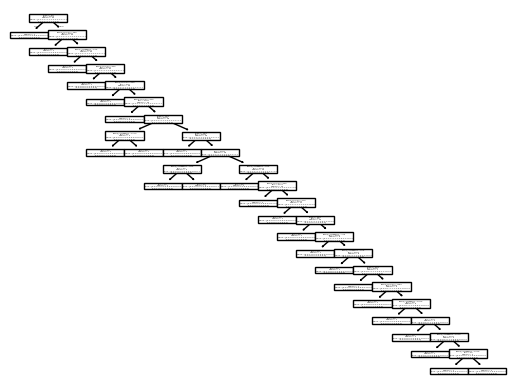

In [203]:
tree.plot_tree(dtree, feature_names=data)
## my code was showing the tree but it is not now....

In [204]:
# I have encountered a problem my above image is showing
# but it is not showing what is in the decision

# now I am going to try and fix this isssue

iris = datasets.load_iris()
XVAL = iris.data
y = iris.target

In [205]:
sportsTree = DecisionTreeClassifier()
sportsTree = sportsTree.fit(XVAL, y)

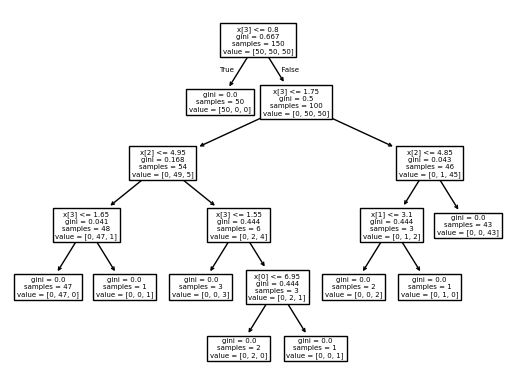

In [206]:
tree.plot_tree(sportsTree)
plt.show()
## my code was showing the tree but it is not now....

In [207]:
myTree = sportsTree.fit(XVAL, y)

In [208]:
tree.plot_tree(myTree)
## my code was showing the tree but it is not now....

## I have to have this bit of code to save the image to another file:

plt.savefig("my decision tree not in colour", dpi=300)  # Save as a PNG file with high resolution
plt.close()  # Close the figure to free memory

In [209]:
# now I want to try and make my dataset a bit bigger in order to make my decision tree a bit bigger and easier to read due to having more data

df = pd.DataFrame(read) # here i am making a dataframe to be able to bootstrap(bag) my dataset to make it bigger

In [210]:
bootstrap = df.sample(n=150, replace=True) ## here I am making my dataset to have 150 rows when it used to have 25
## and I have sampling with replacement meaning the same row can be selected multiple times.

In [211]:
bootstrap.to_csv("boot.csv", index=False) ## then I save this to a file called "boot.csv"
## index = false means the dataFrame index (row labels) from the CSV file. Without this, the index would be included as the first column.

In [212]:
# now I am going to use my same dataset but I have used bootstrapping to make my dataset much bigger than it was

biggerDataSet = "boot.csv"

readBigData = pd.read_csv(biggerDataSet)

In [213]:
biggerRows = ['goals_scored', 'goals_conceded', 'wins']

XVAL = readBigData[biggerRows]
y = readBigData['team']

In [214]:
biggerTree = DecisionTreeClassifier(max_depth=5)
biggerTree = biggerTree.fit(XVAL, y)

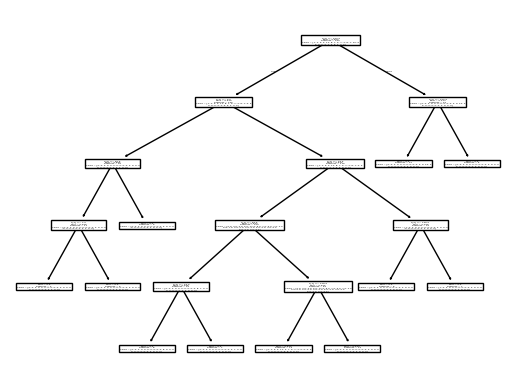

In [215]:
# in the above image I am not able to read the contents of the tree, I need to fix this
tree.plot_tree(biggerTree)
plt.show()
## my code was showing the tree but it is not now....

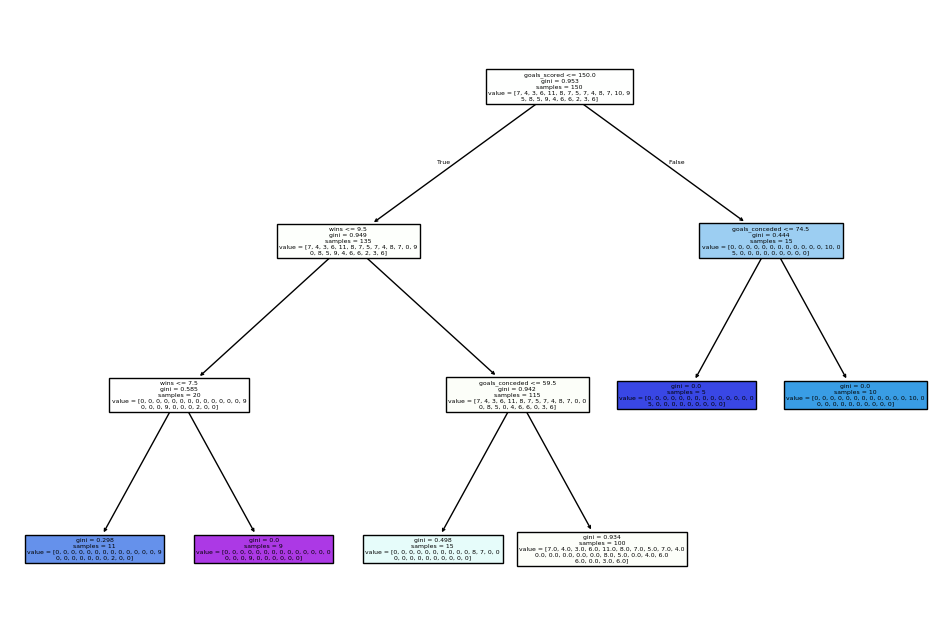

In [216]:
# ---------------------------------------------------------------------------- #
# all of the below code is a combination of all of the above code but in one cell
# ---------------------------------------------------------------------------- #

biggerDataSet = "boot.csv"

# Load the dataset
readBigData = pd.read_csv(biggerDataSet)
biggerRows = ['goals_scored', 'goals_conceded', 'wins']

# Ensure XVAL and y come from the same dataset
XVAL = readBigData[biggerRows]
y = readBigData['team']

# Train the decision tree with your custom data
biggerTree = DecisionTreeClassifier(max_depth=3)
biggerTree = biggerTree.fit(XVAL, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(biggerTree, feature_names=biggerRows, filled=True)
plt.show()


In [217]:
plt.figure(figsize=(12, 8))
tree.plot_tree(biggerTree, feature_names=biggerRows, filled=True)

# Save the plot to a file
plt.title("Decision Tree Diagram") ## here I give my plotted tree a title
plt.savefig("my decision tree in colour.png", dpi=300)  # Save as a PNG file with high resolution
plt.close()  # Close the figure to free memory

In [218]:
# i need to predict my model, to see how good it is

print(biggerTree.predict(XVAL))

['Liverpool' 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion' 'Leeds United'
 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Leeds United' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Leeds United' 'Liverpool'
 'Brighton and Hove Albion' 'Luton Town' 'Brighton and Hove Albion'
 'Manchester City' 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Liverpool' 'Leeds United'
 'Brighton and Hove Albion' 'Brighton and Hove Albion' 'Manchester City'
 'Nottingham Forest' 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion'
 'Brighton and Hove Albion' 'Brighton and Hove Albion' 'Manchester City'
 'Brighton and Hove Albion' 'Brighton and Hove